<a href="https://colab.research.google.com/github/wallykop/iad-deep-learning/blob/master/Small_Tensorflow_2_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Устанавливаем Tensorflow 2

In [1]:
# Install TensorFlow
try:
  # Colab only, comment if using outside of Colab
  %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [0]:
# Non-colab environment, remove comment if using locally
# (but please, use anaconda)
# !pip install tensorflow==2.0

In [0]:
import tensorflow as tf

In [0]:
assert tf.version.VERSION == '2.0.0', 'Make sure you are using Tensorflow 2'

In [0]:
assert tf.test.is_gpu_available(), 'Make sure you are running with GPU support, you can disable the error by commenting out the check'

# Динамическое вычисление!

### Из Numpy в Tensorflow и обратно

In [0]:
import numpy as np

numpy_array = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
tensorflow_array = tf.convert_to_tensor(numpy_array) # работает с питоновскими массивами 
# Alternatively
tensorflow_array = tf.constant(numpy_array) # только нампай массивы

In [9]:
print('Numpy:', repr(numpy_array))
print('Tensorflow:', repr(tensorflow_array)) # repr()(canonical representation)

Numpy: array([1., 2., 3., 4., 5.])
Tensorflow: <tf.Tensor: id=3, shape=(5,), dtype=float64, numpy=array([1., 2., 3., 4., 5.])>


In [10]:
print('From Tensorflow to Numpy:', repr(tensorflow_array.numpy()))

From Tensorflow to Numpy: array([1., 2., 3., 4., 5.])


### Операции с тензорами

Все операции с тензорами возможны "на лету"

In [11]:
a = tf.convert_to_tensor([1, 2, 3])
b = tf.convert_to_tensor([10, 20, 30])
c = 10

N = np.array([7, 8, 9])

# A + B
ab_sum = a + b
# print intermediate result
print(ab_sum)

# C * (A + B)
c_times_ab_sum = c * ab_sum
print(c_times_ab_sum)

# C * (A + B) + N
total = c_times_ab_sum + N
print(total)

tf.Tensor([11 22 33], shape=(3,), dtype=int32)
tf.Tensor([110 220 330], shape=(3,), dtype=int32)
tf.Tensor([117 228 339], shape=(3,), dtype=int32)


### Eager execution vs Graph execution

In [0]:
# Taken from: https://www.tensorflow.org/guide/function

# Сложная питоновская функция с циклом
def eager_execution_func(items):
  s = 0
  for c in items:
    if c % 2 > 0:
      continue
    s += c
  return s

# tf.function конвертирует функцию в статический граф
@tf.function # в c++
def graph_execution_func(items):
  s = 0
  for c in items:
    if c % 2 > 0:
      continue
    s += c
  return s

In [13]:
# Automatic function graph:
print(tf.autograph.to_code(graph_execution_func.python_function))

def tf__graph_execution_func(items):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('graph_execution_func', 'graph_execution_func_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as graph_execution_func_scope:
    s = 0

    def get_state_2():
      return ()

    def set_state_2(_):
      pass

    def loop_body(iterates, s):
      c = iterates
      continue_ = False

      def get_state():
        return ()

      def set_state(_):
        pass

      def if_true():
        continue_ = True
        return continue_

      def if_false():
        return continue_
      cond = c % 2 > 0
      continue_ = ag__.if_stmt(cond, if_true, if_false, get_state, set_state, ('continue_',), ())

      def get_state_1():
        return ()

      def set_state_1(_):
        pass

      def if_true_1():
        s_1, = s,
        s_1 += c
        return s_1

      def if_false_1():
      

In [14]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

eager_execution_times = []
graph_execution_times = []
sizes = 10 ** np.arange(6)

for size in tqdm(sizes):
  items_for_test = tf.random.uniform(shape=[size],
                                     minval=0,
                                     maxval=1000,
                                     dtype=tf.int32)
  
  start_eager = time.time()
  eager_execution_func(items_for_test)
  end_eager = time.time()
  eager_execution_times.append(end_eager - start_eager)

  start_graph = time.time()
  graph_execution_func(items_for_test)
  end_graph = time.time()
  graph_execution_times.append(end_graph - start_graph)

 67%|██████▋   | 4/6 [00:04<00:03,  1.80s/it]

 83%|████████▎ | 5/6 [00:11<00:03,  3.44s/it]

100%|██████████| 6/6 [01:38<00:00, 28.43s/it]


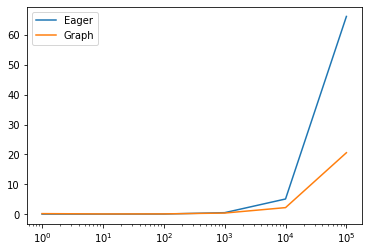

In [15]:
plt.plot(sizes, eager_execution_times, label='Eager')
plt.plot(sizes, graph_execution_times, label='Graph')
plt.xscale('log')
plt.legend()

1 строчка кода, а прирост в 6 раз!

__Вывод__: можно делать отладку в eager режиме, а модели обучать в режиме статического графа (если хочется больше производительности).

### Встроенный Keras
#### Обучим сеточку на MNIST (в который раз)

In [16]:
# Taken from https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


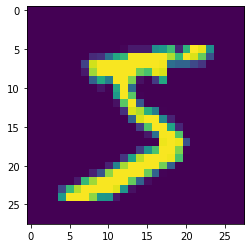

In [17]:
plt.imshow(x_train[0])

In [0]:
fully_connected = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

fully_connected.compile(optimizer=optimizer,#'adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [27]:
fully_connected.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
fully_connected.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

fully_connected.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2995 - accuracy: 0.9140 - val_loss: 0.1416 - val_accuracy: 0.9588
Epoch 2/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1442 - accuracy: 0.9574 - val_loss: 0.0996 - val_accuracy: 0.9706
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1084 - accuracy: 0.9670 - val_loss: 0.0887 - val_accuracy: 0.9721
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0907 - accuracy: 0.9712 - val_loss: 0.0748 - val_accuracy: 0.9769
Epoch 5/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0747 - accuracy: 0.9765 - val_loss: 0.0752 - val_accuracy: 0.9776
10000/1 - 1s - loss: 0.0388 - accuracy: 0.9776


[0.07523357505789027, 0.9776]

### Более интересные модели

В Keras можно писать свои классы моделей нейронных сетей

In [0]:
class MySuperModel(tf.keras.Model):
  def __init__(self, number_of_layers, hidden_size):
    super().__init__() # Don't forget to call the base class initializer

    self.all_fc_layers = []
    self.all_fc_layers.append(tf.keras.layers.Flatten())
    for i in range(number_of_layers):
      self.all_fc_layers.append(tf.keras.layers.Dense(hidden_size, activation='relu'))
    self.all_fc_layers.append(tf.keras.layers.Dense(10, activation='softmax'))

  def call(self, model_input):
    current_input = model_input
    for layer in self.all_fc_layers:
      current_input = layer(current_input)
    return current_input

In [30]:
my_super_model = MySuperModel(5, 100)
my_super_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Early stopping on validation accuracy with ease!
# reduce learning rate on plateau (ReduceLROnPlateau) tf.keras.callbacks.ReduceLROnPlateau()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=2) # ранняя остановка -- способ регуляризации модели (если точность не увеличивается в течении 2 эпох, мы останавливаем обучение)
my_super_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2596 - accuracy: 0.9213 - val_loss: 0.1233 - val_accuracy: 0.9612
Epoch 2/20
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1208 - accuracy: 0.9633 - val_loss: 0.1232 - val_accuracy: 0.9637
Epoch 3/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0922 - accuracy: 0.9721 - val_loss: 0.1024 - val_accuracy: 0.9712
Epoch 4/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0740 - accuracy: 0.9771 - val_loss: 0.0890 - val_accuracy: 0.9735
Epoch 5/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0974 - val_accuracy: 0.9706
Epoch 6/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0988 - val_accuracy: 0.9725


In [37]:
my_super_model = MySuperModel(5, 100)
my_super_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
my_super_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[reduce_lr])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2599 - accuracy: 0.9203 - val_loss: 0.1409 - val_accuracy: 0.9554
Epoch 2/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1213 - accuracy: 0.9631 - val_loss: 0.1016 - val_accuracy: 0.9688
Epoch 3/20
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0909 - accuracy: 0.9728 - val_loss: 0.0988 - val_accuracy: 0.9698
Epoch 4/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.1202 - val_accuracy: 0.9649
Epoch 5/20
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0639 - accuracy: 0.9809 - val_loss: 0.1107 - val_accuracy: 0.9684
Epoch 6/20
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0553 - accuracy: 0.9836 - val_loss: 0.0933 - val_accuracy: 0.9726
Epoch 7/20
60000/60000 [=========================

KeyboardInterrupt: ignored

## Tensorflow Datasets

В Tensorflow встроен прекрасный механизм обработки поступающих на вход данных для нейронной сети.

При помощи этого механизма можно легко группировать данные как хочется и применять к ним модификации.

In [0]:
# More on available sources of data here: https://www.tensorflow.org/guide/data#reading_input_data

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [36]:
for element in train_dataset:
  print('Input shape:', element[0].shape)
  print('Target value:', element[1])
  break

Input shape: (28, 28)
Target value: tf.Tensor(5, shape=(), dtype=uint8)


In [0]:
@tf.function
def apply_random_image_augmentation(image, crop_size=0.8):
  # More functions are available in Tensorflow Addons:
  # https://www.tensorflow.org/addons/api_docs/python/tfa/image
  orig_image_shape = np.array(image.shape.as_list())
  new_size = tf.dtypes.cast(orig_image_shape * crop_size, dtype=tf.int32)

  cropped_image = tf.image.random_crop(image, new_size)
  image_with_channels = tf.expand_dims(cropped_image, -1)

  cropped_image = tf.image.resize(image_with_channels, orig_image_shape)
  return cropped_image[:, :, 0]

def apply_random_augmentation_to_ds(image, label):
  return apply_random_image_augmentation(image), label

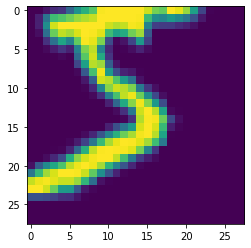

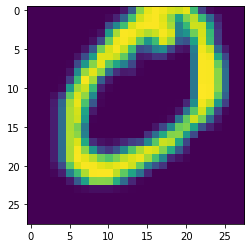

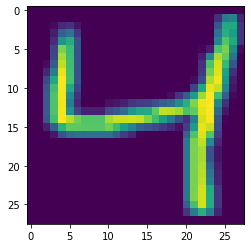

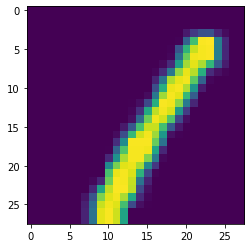

In [39]:
augmented_train = train_dataset.map(apply_random_augmentation_to_ds,
                                    # Tune the number of parallel calls automatically
                                    num_parallel_calls=tf.data.experimental.AUTOTUNE)
for i, element in enumerate(augmented_train):
  if i > 3:
    break
  image = element[0]
  plt.imshow(image.numpy())
  plt.show()

In [0]:
# Prefetch 1000 augmented images
augmented_train = augmented_train.prefetch(1000) # закэшируем в оперативной памяти 1000 массивов
# Batch size of 64
augmented_train = augmented_train.batch(64)

test_dataset = test_dataset.prefetch(1000)
test_dataset = test_dataset.batch(64)

In [41]:
# Any model here would work
my_super_model = MySuperModel(5, 100)
my_super_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Early stopping on validation accuracy with ease!
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5)
my_super_model.fit(augmented_train, epochs=20,
                   validation_data=test_dataset,
                   callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 13s 14ms/step - loss: 0.5585 - accuracy: 0.8184 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
938/938 [==============================] - 10s 10ms/step - loss: 0.2637 - accuracy: 0.9194 - val_loss: 1.1728 - val_accuracy: 0.6593
Epoch 3/20
938/938 [==============================] - 10s 11ms/step - loss: 0.2211 - accuracy: 0.9325 - val_loss: 0.9425 - val_accuracy: 0.7250
Epoch 4/20
938/938 [==============================] - 10s 10ms/step - loss: 0.1910 - accuracy: 0.9421 - val_loss: 0.6170 - val_accuracy: 0.8133
Epoch 5/20
938/938 [==============================] - 10s 11ms/step - loss: 0.1782 - accuracy: 0.9458 - val_loss: 0.6269 - val_accuracy: 0.7980
Epoch 6/20
938/938 [==============================] - 10s 11ms/step - loss: 0.1632 - accuracy: 0.9496 - val_loss: 0.5264 - val_accuracy: 0.8260
Epoch 7/20
938/938 [==============================] - 10s 11ms/step - loss: 0.1566 - accuracy: 0.9522 - val_loss: 0.4900 - val_a